In [1]:
#import standard things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() # use seaborn plotting style

#import file/os things
from pathlib import Path
import pickle
import codecs

#import data science things
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

#import wordcloud for silly visualization
from wordcloud import WordCloud

#import for Tfidf Vectorizer

#import for preprocessing stuff
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


import gensim
from gensim import corpora, models


#import for models for selection
from sklearn import model_selection, svm

#import for making the pipeline
from sklearn.pipeline import make_pipeline

#import for getting stats and stuff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Setup data directory variable for global use
data_dir = Path.home() / "Desktop" / "bah-intermediate" / "CAPSTONE" / "data"
test_data = Path.home() / "Desktop" / "bah-intermediate" / "CAPSTONE" / "test_data"
viz_dir = Path.home() / "Desktop" / "bah-intermediate" / "CAPSTONE" / "visualizations"

In [2]:
df = pickle.load(open(data_dir / 'bbc_df_trimmed.pickle', 'rb'))

df['target'] = df.topic.map({'business':1, 'sport':2, 'politics':3, 'tech':4, 'entertainment':5})

df.head()

,text,title,topic,tokens,stemmed_list,stemmed,lemmed_list,lemmed,word_count,target
0,Ad sales boost Time Warner profit\n\nQuarterly...,Ad sales boost Time Warner profit,business,"[ad, sales, boost, time, warner, profit, quart...","[sale, boost, time, warner, profit, quarterli,...",sale boost time warner profit quarterli profit...,"[sale, boost, time, warner, profit, quarterly,...",sale boost time warner profit quarterly profit...,221,1
1,Dollar gains on Greenspan speech\n\nThe dollar...,Dollar gains on Greenspan speech,business,"[dollar, gains, on, greenspan, speech, the, do...","[dollar, gain, greenspan, speech, dollar, hit,...",dollar gain greenspan speech dollar hit highes...,"[dollar, gain, greenspan, speech, dollar, hit,...",dollar gain greenspan speech dollar hit high l...,212,1
2,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos unit buyer faces loan claim,business,"[yukos, unit, buyer, faces, loan, claim, the, ...","[yuko, unit, buyer, face, loan, claim, owner, ...",yuko unit buyer face loan claim owner embattl ...,"[yukos, unit, buyer, face, loan, claim, owner,...",yukos unit buyer face loan claim owner embattl...,149,1
3,High fuel prices hit BA's profits\n\nBritish A...,High fuel prices hit BA's profits,business,"[high, fuel, prices, hit, ba, 's, profits, bri...","[high, fuel, price, hit, profit, british, airw...",high fuel price hit profit british airway blam...,"[high, fuel, price, hit, profit, british, airw...",high fuel price hit profit british airway blam...,216,1
4,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod takeover talk lifts Domecq,business,"[pernod, takeover, talk, lifts, domecq, shares...","[pernod, takeov, talk, lift, domecq, share, dr...",pernod takeov talk lift domecq share drink foo...,"[pernod, takeover, talk, lift, domecq, share, ...",pernod takeover talk lift domecq share drink f...,152,1


In [3]:
from wordcloud import WordCloud as wc

In [4]:
long_string = ','.join(list(df.lemmed.values))

In [20]:
wordcloud = wc(background_color="white", width=800, height=600, max_words=1000, contour_width=3, contour_color='steelblue')

In [21]:
wordcloud.generate(long_string)
wordcloud.to_file(viz_dir / "wordcloud.jpg")

In [22]:
df.topic.value_counts()

business         510
sport            505
politics         413
tech             392
entertainment    380
Name: topic, dtype: int64

In [8]:
#one list of long strings for each article
big_list2 = df.lemmed.values.tolist()

In [9]:
#one list of multiple lists for individual strings from each article
big_list1 = df.lemmed_list.to_list()

In [10]:
def sentence_convert_to_word(lst):
    return ' '.join(lst).split()

words = sentence_convert_to_word(big_list2)

In [11]:
pd.Series(nltk.ngrams(words, 2)).value_counts()

(last, year)           471
(tell, bbc)            354
(prime, minister)      315
(say, would)           241
(chief, executive)     202
                      ... 
(content, include)       1
(witch, spell)           1
(player, priceless)      1
(henman, overcome)       1
(change, maintain)       1
Length: 284732, dtype: int64

In [12]:
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10].sort_values()
trigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10].sort_values()

In [13]:
fivegrams = (pd.Series(nltk.ngrams(words, 5)).value_counts())[:10].sort_values()

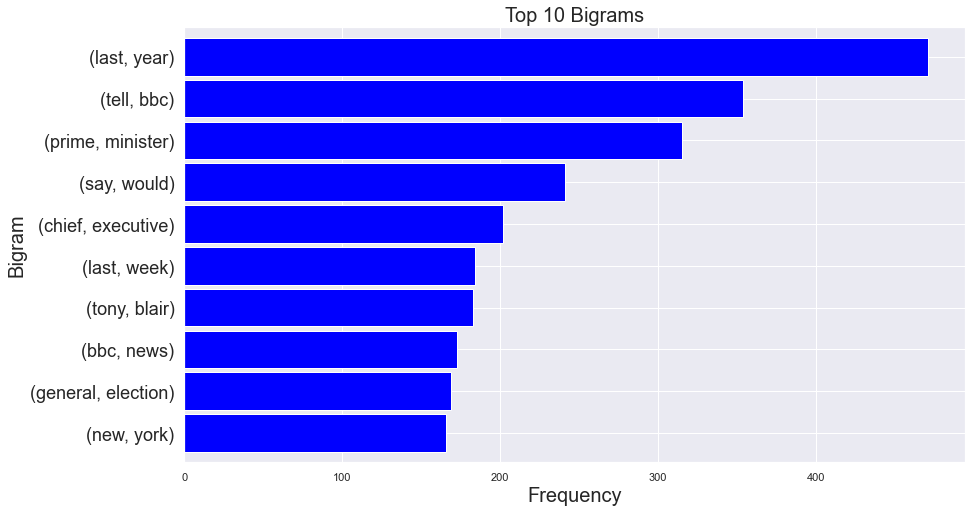

In [14]:
bigrams.plot.barh(color='blue', width=.9, figsize=(14, 8))

plt.yticks(fontsize = 18)
plt.title('Top 10 Bigrams', fontsize = 20)
plt.ylabel('Bigram', fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.savefig(viz_dir / 'bigrams.jpg',
                bbox_inches='tight',
                format='jpg',
                transparent=True)

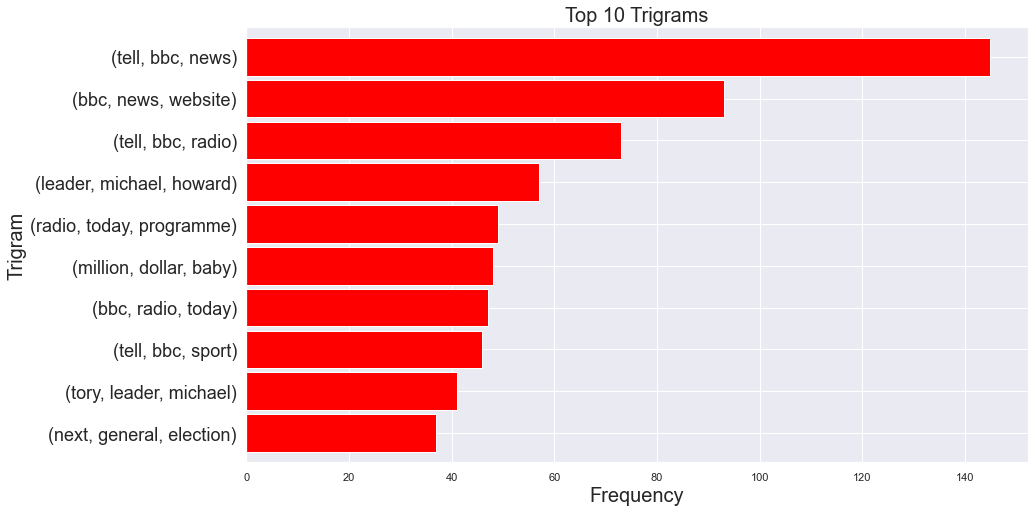

In [18]:
trigrams.plot.barh(color='red', width=.9, figsize=(14, 8))

plt.yticks(fontsize = 18)
plt.title('Top 10 Trigrams', fontsize = 20)
plt.ylabel('Trigram', fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.savefig(viz_dir / 'trigrams.jpg',
                bbox_inches='tight',
                format='jpg',
                transparent=True)

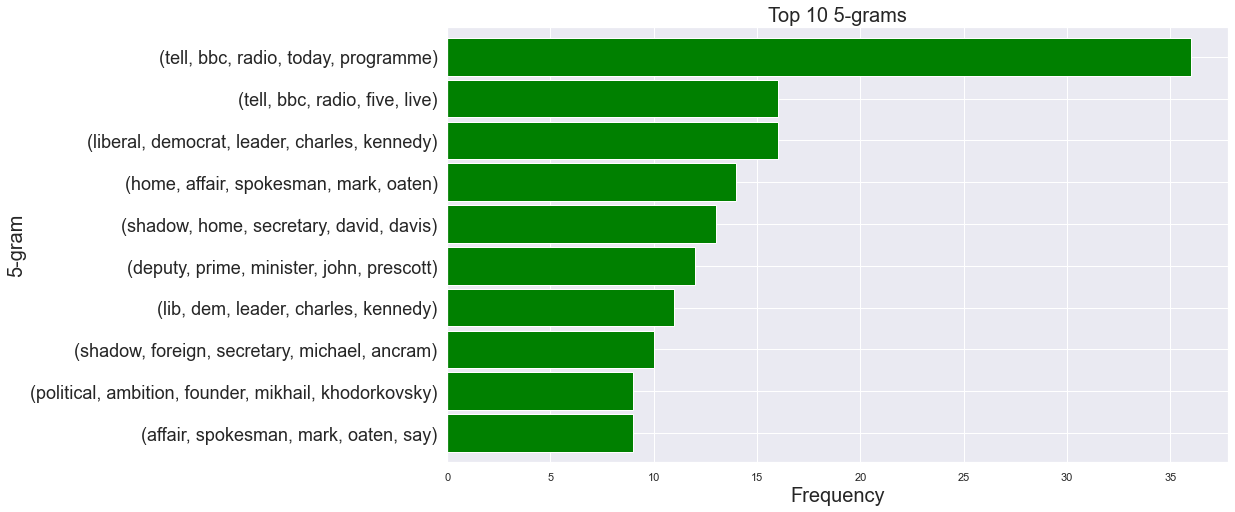

In [19]:
fivegrams.plot.barh(color='green', width=.9, figsize=(14, 8))

plt.yticks(fontsize = 18)
plt.title('Top 10 5-grams', fontsize = 20)
plt.ylabel('5-gram', fontsize = 20)
plt.xlabel('Frequency', fontsize = 20)
plt.savefig(viz_dir / '5grams.jpg',
                bbox_inches='tight',
                format='jpg',
                transparent=True)

In [17]:
# Set the seed.
np.random.seed(42)

dictionary = gensim.corpora.Dictionary(big_list1)

# The loop below iterates through the first 10 items of the dictionary and prints out the key and value.
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 account
1 adjust
2 advert
3 advertising
4 alexander
5 already
6 also
7 amount
8 analyst
9 aol
10 around


In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.5)

In [ ]:
len(dictionary)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in big_list1]
print(bow_corpus[0])

In [ ]:
# Isolate the first document.
bow_doc_1 = bow_corpus[0]
# Iterate through each dictionary item using the index.
# Print out each actual word and how many times it appears.
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0], 
                                                     dictionary[bow_doc_1[i][0]],
                                                     bow_doc_1[i][1]))

In [ ]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
for doc in corpus_tfidf:
    print(doc)

In [ ]:
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                      id2word=dictionary,
                                      num_topics=num_topics)

In [ ]:
from pprint import pprint

pprint(lda_model.print_topics())

In [ ]:
doc_lda = lda_model[bow_corpus]

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

In [ ]:
import os
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
    pickle.dump(LDAvis_prepared, open(data_dir / "ldavis_prepared_5.pickle", "wb"))  

In [ ]:
      
# load the pre-prepared pyLDAvis data from disk
LDAvis_prepared = pickle.load(open(data_dir / "ldavis_prepared_5.pickle", "rb"))
    
pyLDAvis.save_html(LDAvis_prepared, "./data/ldavis_5.html")

LDAvis_prepared

In [ ]:
lda_model.show_topic(2)

In [ ]:
df.describe()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
stop_words = stopwords.words('english')
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(2,5))
lda = LatentDirichletAllocation(n_components=5, random_state=42)
pipe = make_pipeline(tfidf_vectorizer, lda)

In [ ]:
pipe.fit(df.lemmed)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda, tfidf_vectorizer.get_feature_names(), n_top_words=3)

In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df.lemmed)
print(dtm_tfidf.shape)

In [ ]:
lda_tfidf = lda.fit(dtm_tfidf)

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)